In [1]:
import librosa
import librosa.display
import os
import numpy as np
import math
import re 

## Load DataSet Files name

In [3]:
#torgoPath = r"E:\tergo dataset\data and labels" # DataSet path update it 
UASpeech = r"D:\GP\UASpeech\data" # DataSet path update it 

In [4]:
def readDataSetFiles(DataSetPath,labels=True):
    dataSetAllMainFolders= sorted(os.listdir(DataSetPath)) #[f_audio,f_label,m_audio,m_label]
    allDataFilesInDataSetPaths =[DataSetPath + '\\' + Folder+'\\'+File for Folder in dataSetAllMainFolders for File in sorted(os.listdir(DataSetPath + '\\' + Folder)) if re.search('_audio',Folder)] #get all wav files in one list
    if labels:
        allLabelFilesInDataSetPaths=[DataSetPath + '\\' + Folder+'\\'+File for Folder in dataSetAllMainFolders         for File in sorted(os.listdir(DataSetPath + '/' + Folder)) if re.search('_label',Folder)] #get all txt files in one list
    else:allLabelFilesInDataSetPaths=[]
    del(dataSetAllMainFolders)
    return allDataFilesInDataSetPaths,allLabelFilesInDataSetPaths


In [5]:
#allDataFilesInDataSetPaths,allLabelFilesInDataSetPaths=readDataSetFiles(torgoPath) #for Torgo Dataset
allDataFilesInDataSetPaths,allLabelFilesInDataSetPaths=readDataSetFiles(UASpeech,labels=False)#for UASpeech Dataset and call readLabelsLinesFromTxt function


In [6]:
print(len(allDataFilesInDataSetPaths))
print(len(allLabelFilesInDataSetPaths))
print('first data file',allDataFilesInDataSetPaths[:1],'last data file',allDataFilesInDataSetPaths[-1:])
print('first label file',allLabelFilesInDataSetPaths[:1],'last label file',allLabelFilesInDataSetPaths[-1:])

7526
0
first data file ['D:\\GP\\UASpeech\\data\\CF02_audio\\CF02_0001.wav'] last data file ['D:\\GP\\UASpeech\\data\\F02_audio\\F02_3701.wav']
first label file [] last label file []


In [7]:
def readLabelsLinesFromTxt(dataSetPath):
    errorReadLabelTxtFile,allLabelFilesInDataSetPaths=[],[]
    labelsFiles=[labelFiles for labelFiles in os.listdir(dataSetPath+'\\..') if labelFiles.endswith('.txt')] 
    for labelsFileName in labelsFiles:
        try:
            with open(dataSetPath+'\\..\\'+labelsFileName) as labelTxtFile:
                allLabelFilesInDataSetPaths=sorted(labelTxtFile.readlines())
                allLabelFilesInDataSetPaths=[line.split(':')[-1].strip() for line in allLabelFilesInDataSetPaths]
        except:
            errorReadLabelTxtFile.append(labelsFileName)
    return allLabelFilesInDataSetPaths,errorReadLabelTxtFile

In [8]:
allLabelFilesInDataSetPaths,errorReadLabelTxtFile=readLabelsLinesFromTxt(UASpeech)

In [9]:
print(len(allLabelFilesInDataSetPaths))
print(len(errorReadLabelTxtFile))

7526
0


In [10]:
print (allLabelFilesInDataSetPaths[:10])

['LINE', 'LINE', 'LINE', 'LINE', 'LINE', 'PARAGRAPH', 'PARAGRAPH', 'PARAGRAPH', 'PARAGRAPH', 'PARAGRAPH']


# set variables as default values 

In [11]:
SAMPLE_RATE = 16000
AUDIO_DURATION = 10 # measured in seconds


# Extract signal and mfcc feature form waves

In [12]:
def extractSignal_mfccFeature(allAudioFilesPaths,sampleRate,audioDuration):
    allWavesInDataAsNumpyArray, errorFilesInDataset,mfccFeaturesNumpyArray= [] ,[] ,[] 
    for dataFilePath in allAudioFilesPaths: # all wave files paths
        print(dataFilePath.split('\\')[-1])
        try:
            signal, sampleRate = librosa.load(dataFilePath , sr = sampleRate , duration = audioDuration , res_type='kaiser_fast')#get signals and sampleRate in ane wave (dataFilePath)   
            mfccs = np.mean(librosa.feature.mfcc(y=signal, sr=sampleRate, n_mfcc=40).T,axis=0)  #get mfcc array featture for one wave   
        except :
            errorFilesInDataset.append(dataFilePath) #collect name of file that have error to find it
        feature = np.array(mfccs).reshape([-1,1]) #get mfcc array featture for one wave after reshape it
        mfccFeaturesNumpyArray.append(feature)  #apeend featture array to get list of all waves feature                       
        allWavesInDataAsNumpyArray.append(signal) #apeend signal array to get list of all waves signals
    return mfccFeaturesNumpyArray,allWavesInDataAsNumpyArray,errorFilesInDataset

In [13]:
%%time
mfccFeaturesAsNumpyArray,allWavesInDataAsNumpyArray,errorFilesInDataset = extractSignal_mfccFeature(allDataFilesInDataSetPaths[:],SAMPLE_RATE,AUDIO_DURATION)

02_2165.wav
F02_2166.wav
F02_2167.wav
F02_2168.wav
F02_2169.wav
F02_2170.wav
F02_2171.wav
F02_2172.wav
F02_2173.wav
F02_2174.wav
F02_2175.wav
F02_2176.wav
F02_2177.wav
F02_2178.wav
F02_2179.wav
F02_2180.wav
F02_2181.wav
F02_2182.wav
F02_2183.wav
F02_2184.wav
F02_2185.wav
F02_2186.wav
F02_2187.wav
F02_2188.wav
F02_2189.wav
F02_2190.wav
F02_2191.wav
F02_2192.wav
F02_2193.wav
F02_2194.wav
F02_2195.wav
F02_2196.wav
F02_2197.wav
F02_2198.wav
F02_2199.wav
F02_2200.wav
F02_2201.wav
F02_2202.wav
F02_2203.wav
F02_2204.wav
F02_2205.wav
F02_2206.wav
F02_2207.wav
F02_2208.wav
F02_2209.wav
F02_2210.wav
F02_2211.wav
F02_2212.wav
F02_2213.wav
F02_2214.wav
F02_2215.wav
F02_2216.wav
F02_2217.wav
F02_2218.wav
F02_2219.wav
F02_2220.wav
F02_2221.wav
F02_2222.wav
F02_2223.wav
F02_2224.wav
F02_2225.wav
F02_2226.wav
F02_2227.wav
F02_2228.wav
F02_2229.wav
F02_2230.wav
F02_2231.wav
F02_2232.wav
F02_2233.wav
F02_2234.wav
F02_2235.wav
F02_2236.wav
F02_2237.wav
F02_2238.wav
F02_2239.wav
F02_2240.wav
F02_2241.wav


## Extract Text of audio form txt file

In [46]:
# def extractTextFromTextFiles(LabelOfDataSetPaths):
#     allLabelsInDatasetText,errorTextFilePaths=[],[]
#     for labelFilePath in LabelOfDataSetPaths:  # all txt files
#         try:
#             with open(labelFilePath, "r") as labelTextFile: # open label file
#                 allLabelsInDatasetText.append(labelTextFile.read().strip()) #get labels text in one list without duple spaces or \n
#             print(labelFilePath.split('\\')[-1])
#         except:
#             errorTextFilePaths.append(labelFilePath)
#             print(errorTextFilePaths[:10])
#     return allLabelsInDatasetText,errorTextFilePaths

In [14]:
%%time
allLabelsInDatasetText = allLabelFilesInDataSetPaths[:]


Wall time: 192 ms
Parser   : 178 ms


In [15]:
print(allLabelsInDatasetText[:10])
print(len(allLabelsInDatasetText),'\n\n')
print(allWavesInDataAsNumpyArray[0])
print(len(allWavesInDataAsNumpyArray),'\n\n')
print(errorFilesInDataset)

['LINE', 'LINE', 'LINE', 'LINE', 'LINE', 'PARAGRAPH', 'PARAGRAPH', 'PARAGRAPH', 'PARAGRAPH', 'PARAGRAPH']
7526 


[ 0.00033569  0.00131226  0.0005188  ... -0.00595093 -0.00631714
 -0.00698853]
7526 


[]


In [16]:
print(mfccFeaturesAsNumpyArray[0])
print(len(mfccFeaturesAsNumpyArray))

[[-3.39598303e+02]
 [ 6.35055999e+01]
 [ 2.33355985e-01]
 [-2.56166775e+00]
 [-1.07875291e+00]
 [-9.32629395e+00]
 [ 1.70863522e+00]
 [-9.02690650e+00]
 [-5.76861192e+00]
 [-6.53498057e+00]
 [-1.47162044e+01]
 [-3.40623124e+00]
 [-1.89331472e+01]
 [-1.92594784e+01]
 [-1.28104879e+01]
 [-9.60204163e+00]
 [ 3.48377746e+00]
 [-9.17977736e+00]
 [-1.26638480e+01]
 [-7.79068079e+00]
 [-1.26236413e+01]
 [-8.11980779e+00]
 [-9.07175249e+00]
 [ 1.02863725e+00]
 [-1.05885632e+01]
 [-3.83751878e+00]
 [-2.02553214e+00]
 [-8.73863809e-01]
 [-5.95203189e+00]
 [-2.87458087e+00]
 [-9.98945875e+00]
 [-1.65085645e+00]
 [-4.54909728e+00]
 [ 5.75896025e-01]
 [-2.88337957e-01]
 [-2.35435166e+00]
 [-1.73025904e+00]
 [-3.51676950e+00]
 [-1.00009727e+01]
 [-9.82892507e+00]]
7526


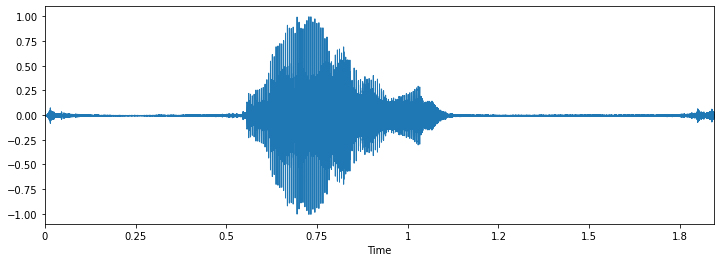

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
librosa.display.waveplot(allWavesInDataAsNumpyArray[0], sr = SAMPLE_RATE )

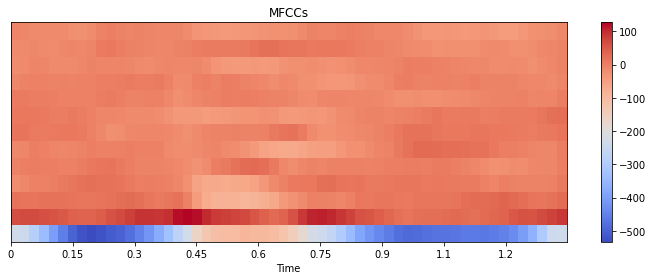

In [18]:
MFCCs = librosa.feature.mfcc(allWavesInDataAsNumpyArray[0], SAMPLE_RATE, n_mfcc=13)
# display MFCCs
plt.figure(figsize=(10,4))
librosa.display.specshow(MFCCs, x_axis = 'time')
plt.colorbar()
plt.title("MFCCs")
plt.tight_layout()
plt.show()

In [19]:
MFCCs = librosa.feature.mfcc(allWavesInDataAsNumpyArray[0], SAMPLE_RATE, n_mfcc=13)
MFCCs = MFCCs.T
print(MFCCs)

[[-2.31430659e+02  6.59813423e+01  2.07431931e+01 -1.77898072e+01
  -2.58575941e+00 -1.09159273e+01  1.81270049e+01  1.21803370e+01
   8.24931531e+00 -8.88406163e+00 -1.91978868e+01 -1.27170324e+01
  -6.88417612e+00]
 [-2.43022140e+02  6.77764200e+01  1.81874821e+01 -1.22062561e+01
   7.64417635e-01 -7.36720047e+00  1.62263300e+01  1.26980130e+01
   6.11584414e+00 -3.46002176e+00 -1.41676410e+01 -1.27568848e+01
  -8.07170153e+00]
 [-2.89469072e+02  6.89792527e+01  1.80405610e+01 -1.48161120e+00
   3.23981224e+00  2.05598363e+00  9.99648801e+00  1.17505895e+01
   3.48814959e+00 -9.75186535e-01 -7.10310236e+00 -9.86129139e+00
  -1.26123382e+01]
 [-3.40574206e+02  6.45380927e+01  2.01765185e+01 -2.89359612e-01
   7.64811121e-01 -3.56850248e-01  6.86725882e+00  9.17528766e+00
   3.58462640e+00 -1.28149013e+00 -8.86745406e+00 -1.28874154e+01
  -1.48591590e+01]
 [-3.99587417e+02  5.93135312e+01  1.97680618e+01  2.02453877e+00
   8.92603499e-01 -5.23825056e+00  1.01314755e+01  4.20988233e+00


In [20]:
print(mfccFeaturesAsNumpyArray)

   [-7.24331900e-01],
       [-3.00906922e+00],
       [-5.39007992e+00],
       [-8.90862093e+00],
       [-2.82718642e+00],
       [-1.56642977e-01],
       [-3.80365405e+00],
       [-3.51244179e+00],
       [-3.72825645e+00],
       [-2.61856027e+00],
       [-9.13419709e-01],
       [ 3.23327945e+00],
       [-6.71141184e-01],
       [ 1.92160747e+00]]), array([[-4.20285592e+02],
       [ 3.42305659e+01],
       [ 1.89475750e+01],
       [ 5.05690065e+00],
       [-1.38403997e+01],
       [-1.33540673e+01],
       [-1.16008028e+01],
       [ 2.40609607e-01],
       [-6.47172909e+00],
       [-4.62965712e+00],
       [-6.70830123e+00],
       [-3.20513221e+00],
       [-4.12830603e+00],
       [-5.82759628e+00],
       [-5.45026789e+00],
       [-7.83623158e+00],
       [-6.66967296e+00],
       [-3.06710390e+00],
       [-5.22546403e+00],
       [ 2.98120758e-01],
       [-5.21397669e+00],
       [-3.87728629e+00],
       [-2.72695010e+00],
       [-2.82594348e+00],
       [ 8.582

In [32]:
X = np.expand_dims(mfccFeaturesAsNumpyArray, axis=-1)
print(X.shape)

(7526, 40, 1, 1)


In [22]:
#  X = np.array(mfccFeaturesAsNumpyArray)
#  #X = np.array(mfccFeaturesAsNumpyArray[0])
#  print(X.shape)

(7526, 40, 1)


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(allLabelsInDatasetText)
classes = list(le.classes_)
print(y.shape)

(7526,)


In [24]:
from keras.utils import np_utils
y = np_utils.to_categorical(y)
#, num_classes = len(allLabelsInDatasetText)
y = np.array(y)  
print(y.shape)

(7526, 449)


In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [26]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , Activation , Flatten , Conv2D, MaxPooling2D, TimeDistributed, LSTM , Bidirectional
from keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [24]:
#x_train = x_train.reshape(x_train.shape + (1,))
#x_test = x_test.reshape(x_test.shape + (1,))

In [48]:
print(x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(6020, 40, 1, 1)
(1506, 40, 1, 1)
(6020, 449)
(1506, 449)


In [ ]:
#X_train = np.empty(shape=(len(fnames), config.dim[0], config.dim[1], 1))

In [ ]:
#X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
#X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)

In [ ]:
# class Config(object):
#     def __init__(self,
#                  sampling_rate=16000, audio_duration=10, 
#                  learning_rate=0.0001, max_epochs=20, n_mfcc=13):
#         self.sampling_rate = sampling_rate
#         self.audio_duration = audio_duration
#         self.n_mfcc = n_mfcc
#         self.learning_rate = learning_rate
#         self.max_epochs = max_epochs
#         self.audio_length = self.sampling_rate * self.audio_duration
#         self.dim = (self.n_mfcc, 1 + int(np.floor(self.audio_length/512)), 1)

In [40]:
#config = Config(sampling_rate=SAMPLE_RATE, audio_duration=AUDIO_DURATION, learning_rate=0.001, n_mfcc=13)
#test = np.empty(shape=(len(X), SAMPLE_RATE, AUDIO_DURATION, 1))

#, n_classes=10

MemoryError: Unable to allocate 8.97 GiB for an array with shape (7526, 16000, 10, 1) and data type float64

In [28]:
def plot_confusion_matrix(y_true, y_pred):
    """
    plots the confusion matrix
    """
    matrix = confusion_matrix(y_true, y_pred)    
    fig, ax = plt.subplots(figsize=(12,10))
    plt.imshow(matrix)
    max_confusions = 0
    confused_classes = (-1, -1)
    for i, true_label in enumerate(matrix):
        for j, predicted_label in enumerate(true_label):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="w");
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.title("Confusion Matrix");

def plot_loss(history):
    from matplotlib import pyplot as plt
    plt.figure(figsize=(10,7))
    plt.plot(history.history['loss'], c ="darkblue")
    plt.plot(history.history['val_loss'], c ="crimson")
    plt.legend(["Train", "Validation"])
    plt.title("Model loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True, alpha = 0.2)
    plt.show()

In [92]:
model = Sequential()

#F-CNN
model.add(Conv2D(32,kernel_size = (8,1), padding = 'same' ,activation = 'relu',input_shape = x_train.shape[1:]))
model.add(MaxPooling2D(pool_size= (3,3) ,strides = 3, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size = (4,1), padding = 'same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size= (3,3) ,strides = 3, padding = 'same'))
model.add(Dropout(0.2))


model.add(TimeDistributed(Flatten(input_shape=(5,1,128))))

model.add(Bidirectional(LSTM(320,return_sequences = True)))
model.add(Bidirectional(LSTM(320)))
model.add(Dense(y_train.shape[1],activation = 'softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 40, 1, 32)         288       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 1, 32)         0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 14, 1, 32)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 1, 64)         8256      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 1, 64)          0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 5, 1, 64)          0         
_________________________________________________________________
time_distributed_12 (TimeDis (None, 5, 64)           

In [93]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
# Training the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
189/189 [==============================] - 151s 703ms/step - loss: 6.0780 - accuracy: 0.0029 - val_loss: 5.9347 - val_accuracy: 0.0053
Epoch 2/20
189/189 [==============================] - 67s 355ms/step - loss: 5.8961 - accuracy: 0.0044 - val_loss: 5.7934 - val_accuracy: 0.0126
Epoch 3/20
189/189 [==============================] - 68s 360ms/step - loss: 5.7300 - accuracy: 0.0112 - val_loss: 5.4814 - val_accuracy: 0.0193
Epoch 4/20
189/189 [==============================] - 71s 377ms/step - loss: 5.3594 - accuracy: 0.0233 - val_loss: 5.1295 - val_accuracy: 0.0352
Epoch 5/20
189/189 [==============================] - 67s 357ms/step - loss: 4.9020 - accuracy: 0.0437 - val_loss: 4.8708 - val_accuracy: 0.0485
Epoch 6/20
189/189 [==============================] - 73s 387ms/step - loss: 4.5456 - accuracy: 0.0643 - val_loss: 4.5827 - val_accuracy: 0.0757
Epoch 7/20
189/189 [==============================] - 72s 379ms/step - loss: 4.1500 - accuracy: 0.1014 - val_loss: 4.3198 - val_a

KeyboardInterrupt: 

In [39]:
y_pred = model.predict(x_test)
test_eval = model.evaluate(x_test, y_pred)
print(test_eval)

48/48 [==============================] - 5s 98ms/step - loss: 2.0705 - accuracy: 1.0000
[2.070521831512451, 1.0]


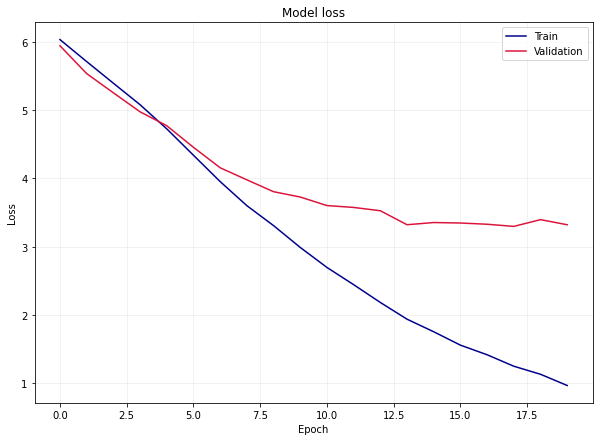

In [38]:
plot_loss(history)

# Don't Run The Cells Below

In [40]:
y_pred_ = model.predict(x_test)

In [41]:
y_pred = np.argmax(y_pred_, axis=1)
y_true = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_true, y_pred)

NameError: name 'confusion_matrix' is not defined

In [211]:
model2 = Sequential()

#T-CNN
model2.add(Conv2D(30,kernel_size = (1,4), padding = 'same',activation = 'relu',input_shape =x_train.shape[1:]))
model2.add(MaxPooling2D(pool_size= (3,3), strides = 3, padding = 'same'))
model2.add(Dropout(0.2))
model2.add(TimeDistributed(Flatten(input_shape=(14,1,90))))
#model.Flatten()
model2.add(LSTM(320,return_sequences = True))
model2.add(LSTM(320))
model2.add(Dense(7526,activation = 'softmax'))

In [212]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [213]:
model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
189/189 [==============================] - 120s 482ms/step - loss: 7.1970 - accuracy: 0.0023 - val_loss: 6.0749 - val_accuracy: 0.0027
Epoch 2/20
189/189 [==============================] - 84s 446ms/step - loss: 6.0587 - accuracy: 0.0027 - val_loss: 6.0385 - val_accuracy: 0.0000e+00
Epoch 3/20
189/189 [==============================] - 84s 446ms/step - loss: 6.0259 - accuracy: 0.0017 - val_loss: 6.0164 - val_accuracy: 0.0027
Epoch 4/20
189/189 [==============================] - 72s 380ms/step - loss: 5.9645 - accuracy: 0.0033 - val_loss: 5.8886 - val_accuracy: 0.0066
Epoch 5/20
189/189 [==============================] - 73s 385ms/step - loss: 5.7566 - accuracy: 0.0095 - val_loss: 5.6797 - val_accuracy: 0.0113
Epoch 6/20
189/189 [==============================] - 78s 412ms/step - loss: 5.4911 - accuracy: 0.0161 - val_loss: 5.5687 - val_accuracy: 0.0100
Epoch 7/20
189/189 [==============================] - 77s 407ms/step - loss: 5.2803 - accuracy: 0.0224 - val_loss: 5.4243 - v

In [ ]:
model3 = Sequential()

#TF-CNN
model3.add(Conv2D(40,kernel_size = (8,4), padding = 'same',activation = 'relu',input_shape =x_train.shape[1:]))
model3.add(MaxPooling2D(pool_size= (3,3), strides = 3, padding = 'same'))
model3.add(Dropout(0.2))
model3.add(TimeDistributed(Flatten(input_shape=(14,1,90))))
model3.add(LSTM(320,return_sequences = True))
model3.add(LSTM(320))
model3.add(Dense(7526,activation = 'softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

In [ ]:
model4 = Sequential()

#PTF-CNN
model4.add(Conv3D(30,kernel_size = (1,4) ,activation = 'relu',input_shape =x_train.shape))
model4.add(MaxPooling1D(pool_size= (3,3), strides = 3))
#add Linear
#model.add(Linear(in_features=4, out_features=3, bias=False))
model4.add(Conv3D(90,kernel_size = (8,1) ,activation = 'relu',input_shape =x_train.shape))
model4.add(MaxPooling1D(pool_size= (3,3) ,strides = 3))

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

In [ ]:
model = Sequential()

#F-CNN original
model.add(Conv2D(90,kernel_size = (8,1), padding = 'same' ,activation = 'relu',input_shape = x_train.shape[1:]))
model.add(MaxPooling2D(pool_size= (3,3) ,strides = 3, padding = 'same'))
model.add(Dropout(0.2))
model.add(TimeDistributed(Flatten(input_shape=(5,1,180))))
model.add(LSTM(320,return_sequences = True))
model.add(LSTM(320))
model.add(Dense(7526,activation = 'softmax'))
model.summary()